# 1.) Overview

In [108]:
import pandas as pd
from pytz import utc
from datetime import datetime
import math

In [57]:
data_reviews = pd.read_csv("reviews.csv",parse_dates=['Timestamp'])

In [58]:
data_reviews.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [4]:
data_reviews.shape

(45000, 4)

In [43]:
data_reviews['Course Name'].unique()

array(['The Python Mega Course: Build 10 Real World Applications',
       'The Complete Python Course: Build 10 Professional OOP Apps',
       '100 Python Exercises I: Evaluate and Improve Your Skills',
       'Interactive Data Visualization with Python and Bokeh',
       'Python for Beginners with Examples',
       'Data Processing with Python',
       '100 Python Exercises II: Evaluate and Improve Your Skills',
       'Learn GIS in One Hour'], dtype=object)

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

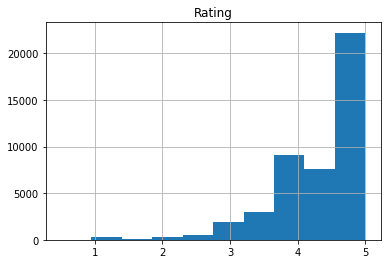

In [5]:
data_reviews.hist()

# 2.) Selecting data from the dataframe

#### Selecting column

In [8]:
mean_rating = data_reviews['Rating'].mean()
mean_rating

4.442155555555556

In [11]:
median_rating = data_reviews["Rating"].median()
median_rating

4.5

#### Selecting multiple columns

In [16]:
two_columns = data_reviews[['Course Name', 'Rating']]
two_columns.head()

,Course Name,Rating
0,The Python Mega Course: Build 10 Real World Ap...,4.0
1,The Python Mega Course: Build 10 Real World Ap...,4.0
2,The Python Mega Course: Build 10 Real World Ap...,4.0
3,The Python Mega Course: Build 10 Real World Ap...,5.0
4,The Python Mega Course: Build 10 Real World Ap...,4.5


#### Selecting row

In [18]:
single_row = data_reviews.iloc[3]
single_row

Course Name    The Python Mega Course: Build 10 Real World Ap...
Timestamp                              2021-04-02 03:33:24+00:00
Rating                                                       5.0
Comment                                                      NaN
Name: 3, dtype: object

#### Selecting multiple rows

In [140]:
multiple_rows = data_reviews.iloc[[1,5,6]]
#multiple_rows = data_reviews.iloc[1:4]
multiple_rows

,Course Name,Timestamp,Rating,Comment
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
5,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 01:10:06+00:00,4.5,NaN
6,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 00:44:54+00:00,4.5,NaN


#### Selecting a specifc cell

In [22]:
cell = data_reviews['Timestamp'].iloc[3]
cell

'2021-04-02 03:33:24+00:00'

In [26]:
cell_2 = data_reviews.at[3,'Timestamp']
cell_2

'2021-04-02 03:33:24+00:00'

# 3.) Filtering data based on conditions

#### One condition

In [40]:
positive_reviews = data_reviews[data_reviews['Rating'] >= 4 ].count()
positive_reviews

Course Name    38873
Timestamp      38873
Rating         38873
Comment         5911
dtype: int64

In [42]:
percantage_comments = positive_reviews['Comment'] / (positive_reviews['Course Name']/100)
percantage_comments

15.20592699302858

#### Multiple Conditions

In [45]:
course_name = 'Data Processing with Python'

In [46]:
df_data_procesessing = data_reviews[(data_reviews['Rating'] > 4) & (data_reviews['Course Name'] == course_name)]

In [49]:
rating = df_data_procesessing['Rating'].mean()
rating

4.842741935483871

# 4.) Filtering my dates

In [129]:
year_2020 = data_reviews[
    (data_reviews['Timestamp'] > datetime(2018,12,31, tzinfo=utc)) &
    (data_reviews['Timestamp'] < datetime(2021,6,30, tzinfo = utc)) &
    (data_reviews['Rating'] < 3) 
    #& (type(data_reviews['Comment']) is float)
]


year_2020

,Course Name,Timestamp,Rating,Comment
57,The Python Mega Course: Build 10 Real World Ap...,2021-03-31 08:41:48+00:00,2.0,Coding is awful confusing. Loads of weird stuf...
64,The Python Mega Course: Build 10 Real World Ap...,2021-03-31 05:50:51+00:00,2.5,NaN
103,100 Python Exercises I: Evaluate and Improve Y...,2021-03-29 19:21:12+00:00,1.0,NaN
115,The Python Mega Course: Build 10 Real World Ap...,2021-03-29 13:25:50+00:00,1.0,NaN
162,The Complete Python Course: Build 10 Professio...,2021-03-27 13:30:15+00:00,1.0,NaN
...,...,...,...,...
30828,The Python Mega Course: Build 10 Real World Ap...,2019-01-03 07:52:04+00:00,1.5,NaN
30849,The Python Mega Course: Build 10 Real World Ap...,2019-01-02 22:04:13+00:00,2.0,NaN
30877,Python for Beginners with Examples,2019-01-02 08:51:22+00:00,2.0,NaN
30907,The Python Mega Course: Build 10 Real World Ap...,2019-01-01 15:49:27+00:00,2.5,NaN
